## Instacart data로 구매 패턴 분석해보기

[데이터 설명]
- 이 데이터셋은 시간에 따른 고객 주문을 설명하는 csv 파일들로 구성되어 있습니다.

- 이 데이터는 사용자가 다음 주문에 포함할 제품들을 예측하는 것입니다. 즉, 어떤 물품을 다시 주문할지 예측하는 문제를 풀어야 합니다.

- 데이터셋은 익명화되어 있으며 20만 명이 넘는 instacart 사용자의 300만건 이상의 주문들을 포함하고 있습니다.

- 각 사용자별로, 4회에서 100회 사이의 주문 데이터가 제공됩니다. 또한 주문이 이루어진 주와 시간, 그리고 주문 간의 상대적인 시간을 제공합니다.

- 데이터 파일은 6개로 구성되어 있으며, 각 csv 파일에 대한 설명은 다음과 같습니다.

각 csv파일들(customer, product, order, aisle, etc.)은 각자의 unique id를 포함하고 있습니다. 각 파일들의 대한 설명을 csv파일 이름과 column 이름을 읽으면 이해 가능한 수준입니다.

[csv별 설명]
1. aisle.csv - 아이템 중분류

2. department.csv - 아이템 대분류

3. orders.csv - 각 주문 내역들에 대한 정보

4. order_products__train.csv - 모든 고객의 이전 주문 내용이 포함되어 있습니다. 'reordered' column은 어떤 고객이 과거에 구매여부를 의미합니다. 일부 주문에는 reordered 품목이 없을 수 있습니다. reordered 품목이 없는 주문의 경우 명시적으로 '없음' 값을 예측할 수 있습니다.

5. products.csv - 각 아이템들에 대한 정보


**이제 위에서 주어진 정보를 기반으로 EDA를 수행하여 아래 10개의 질문에 대한 답변을 출력하는 파이썬 코드를 작성하세요.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Q1. instacart-market-basket-analysis 폴더에서 데이터를 모두 불러오세요.

In [2]:
# 데이터를 불러오면 처음 무조건 파악해야하는 것!
data_path = './data/' ## data_path는 데이터가 있는 폴더의 경로를 의미합니다.

aisles = pd.read_csv(data_path + 'aisles.csv')
departments = pd.read_csv(data_path + 'departments.csv')
orders = pd.read_csv(data_path + 'orders.csv')
train = pd.read_csv(data_path + 'order_products__train.csv')
products = pd.read_csv(data_path + 'products.csv')

In [4]:
aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [5]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [6]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [7]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [8]:
train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


### Q2. 어떤 Product가 가장 많이 reorder가 되었는가?

In [96]:
reorder_sum = train.groupby('product_id').sum()
most_reordered_count = reorder_sum.reordered.max()
most_reordered_product_id = reorder_sum.loc[reorder_sum.reordered == reorder_sum.reordered.max()].index[0]
most_reordered_product = products.loc[products.product_id == most_reordered_product_id]['product_name'].item()
print(f"The most reordered product is {most_reordered_product} (Product ID: {most_reordered_product_id}) with {most_reordered_count} reorders.")

The most reordered product is Banana (Product ID: 24852) with 16557 reorders.


In [92]:
# train 데이터프레임에서 product_id 별로 reordered 합계 계산
reorder_sum = train.groupby('product_id')['reordered'].sum()

# 가장 많이 재주문된 제품 ID 찾기
most_reordered_product_id = reorder_sum.idxmax()

# 가장 많이 재주문된 제품의 재주문 횟수
most_reordered_count = reorder_sum.max()

# products 데이터프레임과 결합하여 제품 이름 가져오기
most_reordered_product = products.loc[products['product_id'] == most_reordered_product_id, 'product_name'].iloc[0]

# 결과 출력
print(f"The most reordered product is {most_reordered_product} (Product ID: {most_reordered_product_id}) with {most_reordered_count} reorders.")

The most reordered product is Banana (Product ID: 24852) with 16557 reorders.


### Q3. 가장 많이 주문된 Product는?

In [98]:
temp = train.groupby('product_id').count()
product_id = temp.loc[temp.order_id == temp.order_id.max()].index[0]
products.loc[products.product_id == product_id]['product_name'].item()

'Banana'

In [99]:
# train 데이터프레임에서 product_id 별로 주문 횟수 계산
order_count = train['product_id'].value_counts()

# 가장 많이 주문된 제품 ID 찾기
most_ordered_product_id = order_count.idxmax()

# 가장 많이 주문된 제품의 주문 횟수
most_ordered_count = order_count.max()

# products 데이터프레임과 결합하여 제품 이름 가져오기
most_ordered_product = products.loc[products['product_id'] == most_ordered_product_id, 'product_name'].iloc[0]

# 결과 출력
print(f"The most ordered product is {most_ordered_product} (Product ID: {most_ordered_product_id}) with {most_ordered_count} orders.")

The most ordered product is Banana (Product ID: 24852) with 18726 orders.


### Q4. reorder가 가장 많이 일어나는 department는?

In [83]:
# train 데이터프레임과 products 데이터프레임을 product_id 기준으로 결합
merged_data = pd.merge(train, products, on='product_id', how='left')

# department_id 별로 reordered 합계 계산
department_reorder_totals = merged_data.groupby('department_id')['reordered'].sum()

# 가장 많이 재주문된 department 찾기
most_reordered_department = department_reorder_totals.idxmax()

# 가장 많이 재주문된 department의 재주문 총량
most_reordered_count = department_reorder_totals.max()

most_reordered_department_name = departments.loc[departments.department_id == most_reordered_department]['department'].item()

# 결과 출력
print(f"The department with the most reorders is Department {most_reordered_department_name} with {most_reordered_count} reorders.")

The department with the most reorders is Department produce with 271886 reorders.


### Q5. order를 가장 많이 한 user는?

In [84]:
# orders 데이터프레임에서 user_id별로 주문 횟수를 계산
user_order_counts = orders['user_id'].value_counts()

# 가장 많은 주문을 한 사용자의 ID
max_orders_user = user_order_counts.idxmax()

# 가장 많은 주문을 한 사용자의 주문 횟수
max_orders_count = user_order_counts.max()

# 결과 출력
print(f"The user with the most orders is User {max_orders_user} with {max_orders_count} orders.")

The user with the most orders is User 152340 with 100 orders.


### Q6. order가 가장 많이 일어난 요일을 bargraph로 나타내면?

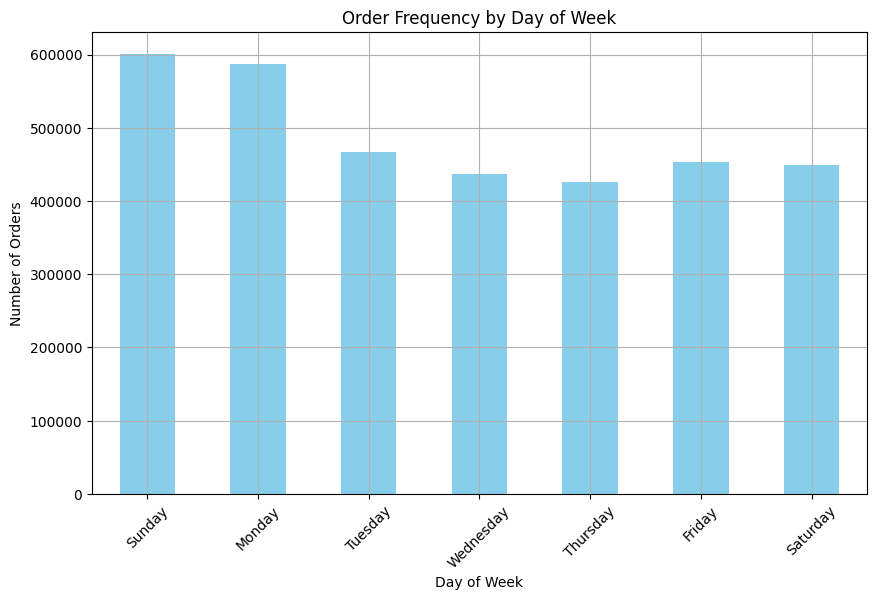

In [85]:
# 요일별 주문 횟수 계산
order_counts_by_dow = orders['order_dow'].value_counts().sort_index()

# 요일 이름 매핑 (0부터 6까지 각각 요일을 나타낸다고 가정)
day_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# 요일별 주문 횟수를 이름으로 매핑
order_counts_by_dow.index = day_names

# 바 그래프로 시각화
plt.figure(figsize=(10, 6))
order_counts_by_dow.plot(kind='bar', color='skyblue')
plt.title('Order Frequency by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Q7. 재구매율이 높은 product top10은?

In [86]:
# 재주문 횟수와 총 주문 횟수를 계산
reorder_counts = train.groupby('product_id')['reordered'].agg(['sum', 'count'])
reorder_counts.columns = ['reorder_sum', 'order_count']

# 재주문 비율 계산
reorder_counts['reorder_ratio'] = reorder_counts['reorder_sum'] / reorder_counts['order_count']

# 재주문 비율이 높은 상위 10개 제품 찾기
top_10_reordered_products = reorder_counts.sort_values(by='reorder_ratio', ascending=False).head(10)

# products 데이터프레임과 결합하여 제품 이름 및 기타 정보 가져오기
top_10_reordered_products = top_10_reordered_products.merge(products, on='product_id')

# 결과 출력
print(top_10_reordered_products[['product_id', 'product_name', 'reorder_ratio']])

   product_id                                       product_name  \
0       24836                     Cat Litter, Scoopable, Scented   
1        6708                                       Orange Navel   
2       29977                                 Bacon Style Slices   
3       29988                             Chocolate Granola Bars   
4       30002                  Antioxidant Blend Frozen Smoothie   
5        6743                       Original Oven Roasted Turkey   
6       30012  Gentlease Infant Formula for Fussiness, Gas, a...   
7       30015                Rich & Creamy Mocha Coffee Beverage   
8       30018                Prime Filets Turkey Dinner In Gravy   
9        6737                               Chocolate Creme Cake   

   reorder_ratio  
0            1.0  
1            1.0  
2            1.0  
3            1.0  
4            1.0  
5            1.0  
6            1.0  
7            1.0  
8            1.0  
9            1.0  


### Q8. 재구매가 가장 많이 일어나는 요일 top3는?

In [89]:
# orders와 train 데이터프레임 결합
merged_data = pd.merge(train, orders, on='order_id')

# 요일별로 재주문 횟수 계산
reorder_by_dow = merged_data[merged_data['reordered'] == 1].groupby('order_dow')['reordered'].count()

# 요일 인덱스를 요일 이름으로 매핑
reorder_by_dow.index = [day_names[i] for i in reorder_by_dow.index]

# 재주문이 가장 많이 일어난 상위 3개 요일 찾기
top_3_reorder_dows = reorder_by_dow.sort_values(ascending=False).head(3)

# 결과 출력
print(top_3_reorder_dows)

Sunday      197534
Monday      123376
Saturday    123173
Name: reordered, dtype: int64


### Q9. days_since_prior에 따른 reorder 횟수 변화를 lineplot과 barplot으로 나타내면?

- x축은 서로 다른 reorder 횟수가 됩니다.

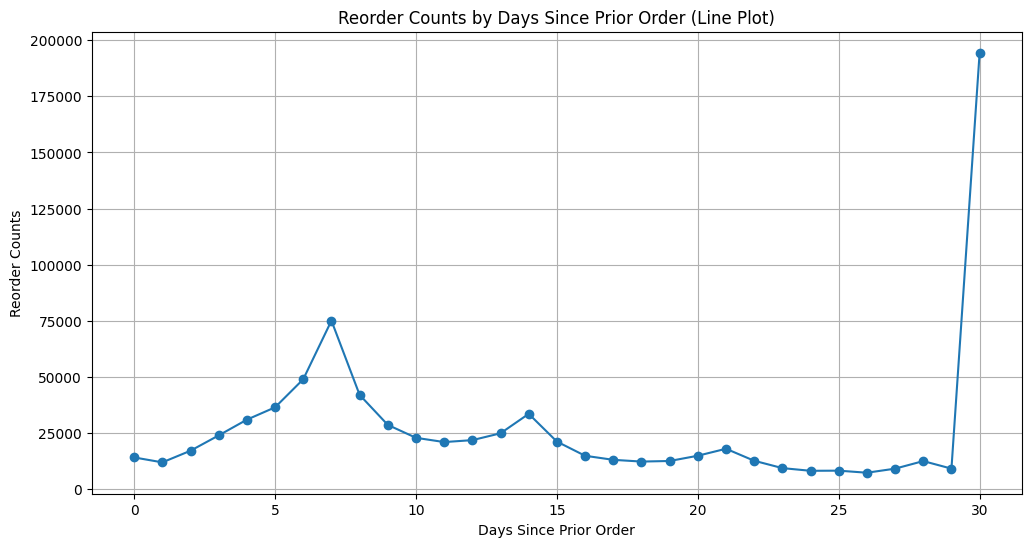

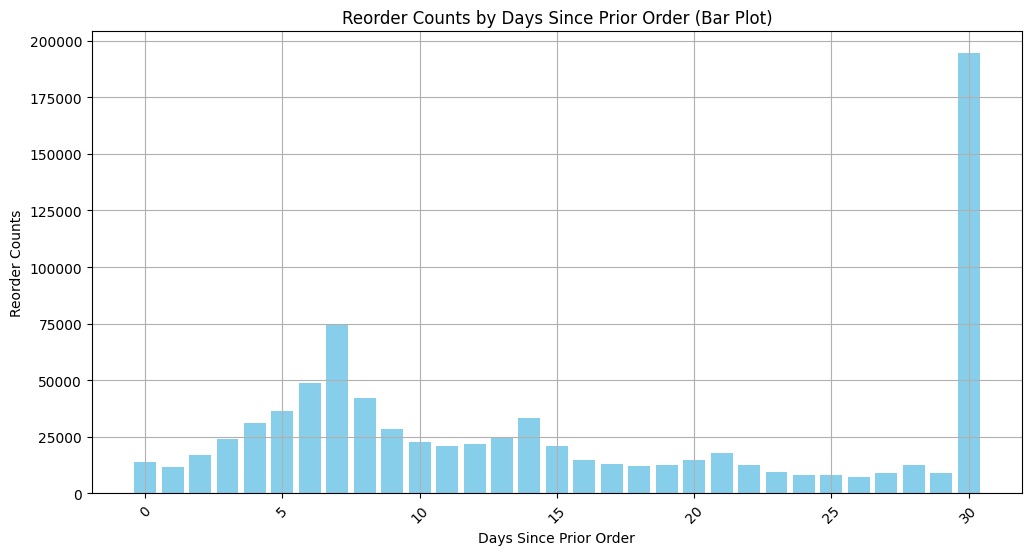

In [90]:
# orders와 train 데이터프레임 결합
merged_data = pd.merge(train, orders, on='order_id')

# days_since_prior_order 별로 reordered 횟수 집계
reorder_counts_by_days_since = merged_data.groupby('days_since_prior_order')['reordered'].sum()

# Line Plot
plt.figure(figsize=(12, 6))
plt.plot(reorder_counts_by_days_since.index, reorder_counts_by_days_since.values, marker='o', linestyle='-')
plt.title('Reorder Counts by Days Since Prior Order (Line Plot)')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Reorder Counts')
plt.grid(True)
plt.show()

# Bar Plot
plt.figure(figsize=(12, 6))
plt.bar(reorder_counts_by_days_since.index, reorder_counts_by_days_since.values, color='skyblue')
plt.title('Reorder Counts by Days Since Prior Order (Bar Plot)')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Reorder Counts')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Q10. 시간대 변화에 따른 order 물량의 변화량을 lineplot과 barplot을 이용하여 나타내면?

- 시간대 변화란 0시부터 23시까지의 시간당 변화를 의미합니다.

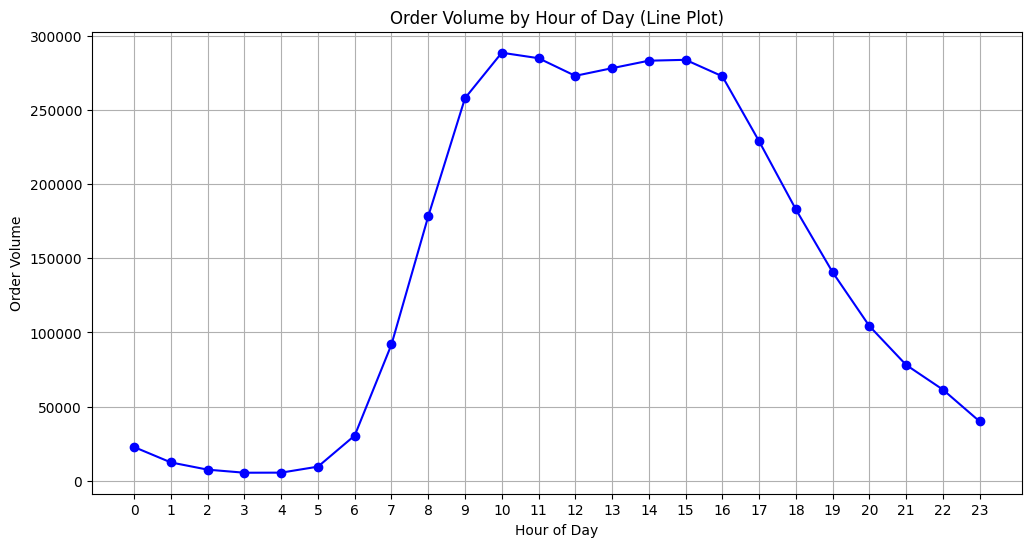

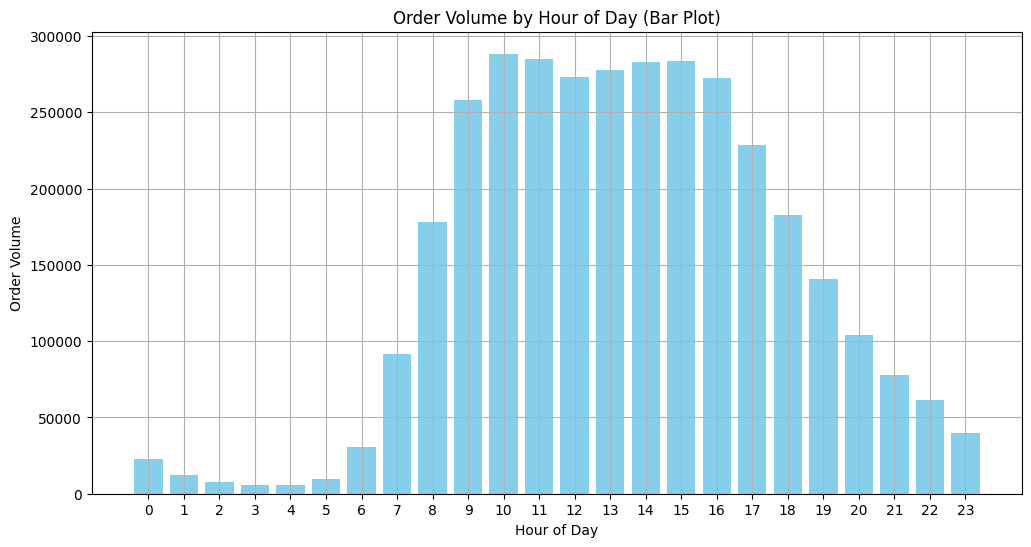

In [91]:
# 시간대별로 주문 횟수 집계
order_counts_by_hour = orders['order_hour_of_day'].value_counts().sort_index()

# Line Plot 생성
plt.figure(figsize=(12, 6))
plt.plot(order_counts_by_hour.index, order_counts_by_hour.values, marker='o', linestyle='-', color='blue')
plt.title('Order Volume by Hour of Day (Line Plot)')
plt.xlabel('Hour of Day')
plt.ylabel('Order Volume')
plt.grid(True)
plt.xticks(range(0, 24))  # X축의 눈금을 0시부터 23시까지 표시
plt.show()

# Bar Plot 생성
plt.figure(figsize=(12, 6))
plt.bar(order_counts_by_hour.index, order_counts_by_hour.values, color='skyblue')
plt.title('Order Volume by Hour of Day (Bar Plot)')
plt.xlabel('Hour of Day')
plt.ylabel('Order Volume')
plt.xticks(range(0, 24))  # X축의 눈금을 0시부터 23시까지 표시
plt.grid(True)
plt.show()